In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
from scipy.integrate import quad

#import constants
const = pd.read_excel('./1-s2.0-S2352939317300374-mmc2.xlsx')

glucose = pd.read_excel('./1-s2.0-S2352939317300374-mmc1.xlsx',sheet_name = 'glucose response data')
insulin = pd.read_excel('./1-s2.0-S2352939317300374-mmc1.xlsx',sheet_name = 'insulin response data')

#Parameters
k1 = const.iloc[1,2] #food related
k2 = const.iloc[1,3] #food related
k3 = 6.07e-3
k4 = 2.35e-4
k5 = 9.49e-2
k6 = 1.93e-1
k7 = 1.15
k8 = 7.27
k9 = 0
k10 = 0
k11 = 3.83e-2
k12 = 2.84e-1
k13 = const.iloc[1,4] #food related
σ = const.iloc[1,5] #food related
KM = 13.2

#Input variables
Dmeal = const.iloc[1,6] #food related
Mb = 75 #body mass (kg)...not sure where to find actual value
usa = 1 #not sure where to find actual values
Ula = 1 #not sure where to find actual values

#Constants
Gbpl = np.array(glucose.iloc[1,4]) # this is just for initial study... Gbpl = Gpl(0)
Ibpl = np.array(insulin.iloc[1,4]) # this is just for initial study... Ibpl = Ipl(0)
gbliv = .043
Gthpl = 9
vG = 17/70
vI = 13/70
β = 1
f = .005551
τi = 31
t_int = 30
τd = 3
c1 = .1
h = 1 #differs by insulin brand
t_half = 1 #differs by insulin brand
a = 1 #differs by insulin brand
b = 1 #differs by insulin brand

#Variables
t = np.linspace(0,120,121)

#Equations (1)-(3)
#def Mingut(t):    
#    def Moutstomach(t):
#        def fGstomach(t):
#            return np.exp(-(k1 * t) ** σ)
#        return Dmeal * fGstomach(t)
#    return Dmeal - Moutstomach(t)

#Glucose in the gut
#def mGgut(t):
#    return σ * (k1**σ) * (t**(σ-1)) * np.exp(-(k1 * t)**σ) * np.exp(-(k13 * t)) * Dmeal
#def mGpl(t):
#    return k2*MGgut

def odes(x,t):    
    #assign each ODE to a vector element
    MGgut = x[0]
    Gpl = x[1]
    Irem = x[2]
    Ipl = x[3]
    UIsc1 = x[4]
    UIsc2 = x[5]
    
    mGgut = σ * (k1**σ) * (t**(σ-1)) * np.exp(-(k1 * t)**σ) * np.exp(-(k13 * t)) * Dmeal
    mGpl = k2*MGgut
    gliv = gbliv - k3*(Gpl - Gbpl) - k4*β*Irem
    ggut = k2 * f * MGgut/(vG* Mb)
    gnonit = gbliv * ((KM + Gbpl)/Gbpl) * (Gpl/(KM +Gpl))
    git = k5 * β * Irem * Gpl / (KM + Gpl)
    if Gpl > Gthpl:
        gren = c1/(vG * Mb) * (Gpl - Gthpl)
    else:
        gren = 0
    
    isa = k9 / (vI*Mb) * UIsc2
    iit = k12 * Irem

    def integrand(t):
        # Define your function here, for example:
        return Gpl - Gbpl
    # Solve the integral
    integral_term, error = quad(integrand, t_int, t)
    t_half = a * Ula + b    
    dGpldt = gliv + ggut - gnonit - git - gren
    ipnc = (β**-1) * (k6*(Gpl - Gbpl) + (k7/τi) * integral_term + (k7/τi)*Gbpl + (k8*τd)*dGpldt)
    ila = h * (t_half**h) * (t**(h-1)) * Ula / ((t_half**h + t**h)**2 * vI * Mb)

    iliv = k7 * Gbpl * Ipl / (β*τi*Ibpl)
    irem = k11 * (Ipl - Ibpl)
    ipl = k11 * (Ipl - Ibpl)  # ipl = irem
    
    #define each ODE
    dMGgutdt = mGgut - mGpl
    dIremdt = ipl-iit
    dIpldt = ipnc + isa + ila - iliv - irem ## for this equation. Do i multiply the functions or no? I think no.
    dUIsc1dt = usa - k10 * UIsc1
    dUIsc2dt = k10 * UIsc1 - k9 * UIsc2
    return [dMGgutdt, dGpldt, dIremdt, dIpldt, dUIsc1dt, dUIsc2dt]

#initial conditions at t = 0
x0 = [0,0,0,0,0,0]

print(odes(x0, True))

[5.229084827181031, 0.0736535, -0.322486, 6.590334541276994, 1, 0]


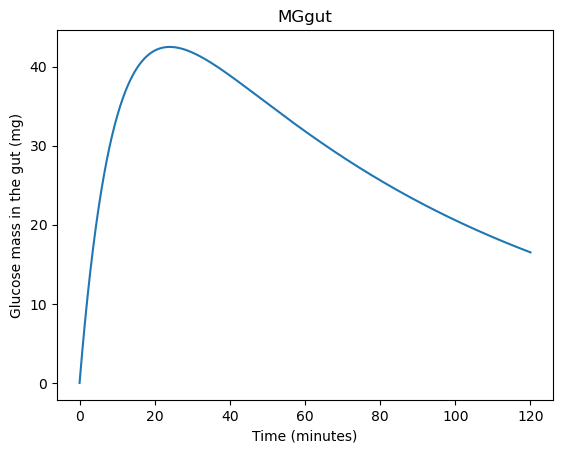

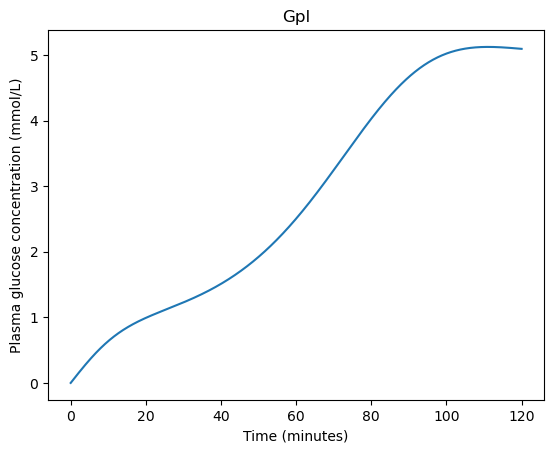

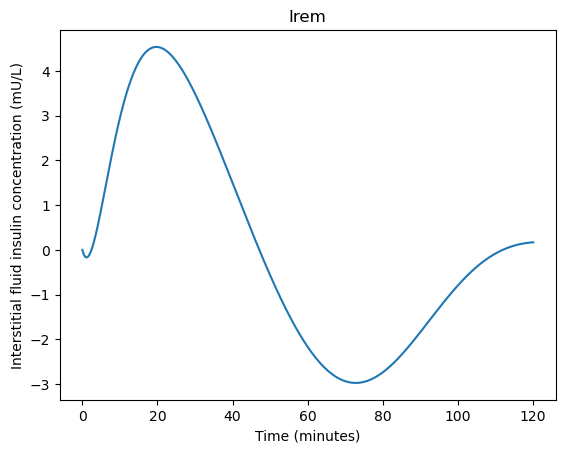

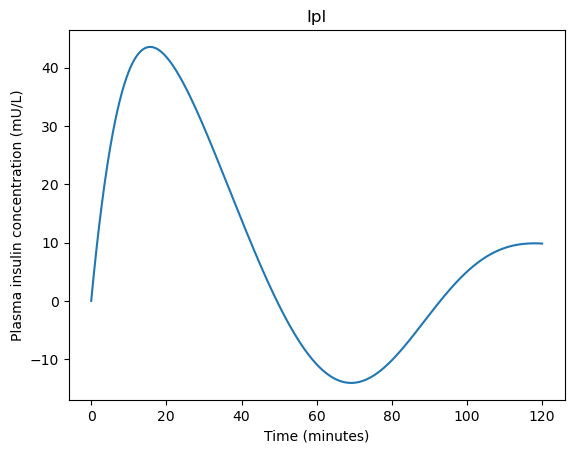

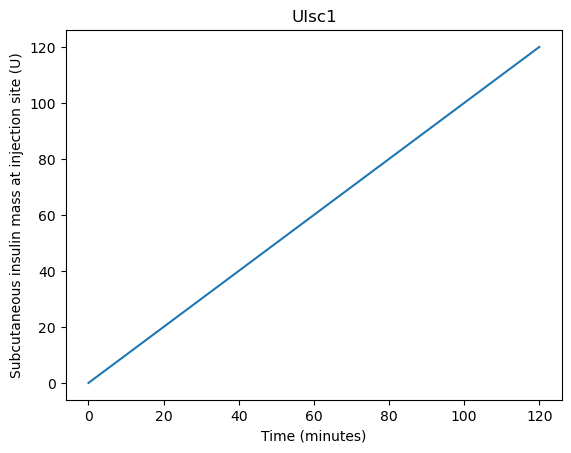

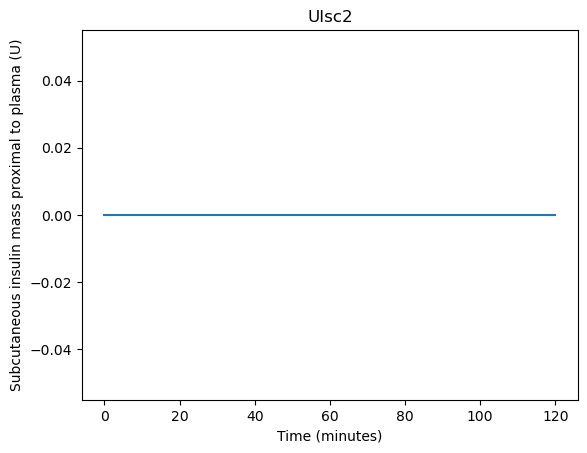

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
from scipy.integrate import quad

#import constants
const = pd.read_excel('./1-s2.0-S2352939317300374-mmc2.xlsx')

glucose = pd.read_excel('./1-s2.0-S2352939317300374-mmc1.xlsx',sheet_name = 'glucose response data')
insulin = pd.read_excel('./1-s2.0-S2352939317300374-mmc1.xlsx',sheet_name = 'insulin response data')

#Parameters
k1 = const.iloc[1,2] #food related
k2 = const.iloc[1,3] #food related
k3 = 6.07e-3
k4 = 2.35e-4
k5 = 9.49e-2
k6 = 1.93e-1
k7 = 1.15
k8 = 7.27
k9 = 0
k10 = 0
k11 = 3.83e-2
k12 = 2.84e-1
k13 = const.iloc[1,4] #food related
σ = const.iloc[1,5] #food related
KM = 13.2

#Input variables
Dmeal = const.iloc[1,6] #food related
Mb = 75 #body mass (kg)...not sure where to find actual value
usa = 1 #not sure where to find actual values
Ula = 1 #not sure where to find actual values

#Constants
Gbpl = np.array(glucose.iloc[1,4]) # this is just for initial study... Gbpl = Gpl(0)
Ibpl = np.array(insulin.iloc[1,4]) # this is just for initial study... Ibpl = Ipl(0)
gbliv = .043
Gthpl = 9
vG = 17/70
vI = 13/70
β = 1
f = .005551
τi = 31
t_int = 30
τd = 3
c1 = .1
h = 1 #differs by insulin brand
t_half = 1 #differs by insulin brand
a = 1 #differs by insulin brand
b = 1 #differs by insulin brand

#Variables
t = np.linspace(0,120,1000)

def dSdt(t, S):
    MGgut, Gpl, Irem, Ipl, UIsc1, UIsc2 = S
    mGpl = k2*MGgut
    ipl = k11 * (Ipl - Ibpl) 
    iit = k12 * Irem
    def integrand(t):
        return Gpl - Gbpl
    integral_term, error = quad(integrand, t_int, t)
    gliv = gbliv - k3*(Gpl - Gbpl) - k4*β*Irem
    ggut = k2 * f * MGgut/(vG* Mb)
    gnonit = gbliv * ((KM + Gbpl)/Gbpl) * (Gpl/(KM +Gpl))
    git = k5 * β * Irem * Gpl / (KM + Gpl)
    if Gpl > Gthpl:
        gren = c1/(vG * Mb) * (Gpl - Gthpl)
    else:
        gren = 0
    dGpldt = gliv + ggut - gnonit - git - gren
    ipnc = (β**-1) * (k6*(Gpl - Gbpl) + (k7/τi) * integral_term + (k7/τi)*Gbpl + (k8*τd)*dGpldt)
    ila = h * (t_half**h) * (t**(h-1)) * Ula / ((t_half**h + t**h)**2 * vI * Mb)
    isa = k9 / (vI*Mb) * UIsc2
    iliv = k7 * Gbpl * Ipl / (β*τi*Ibpl)
    irem = k11 * (Ipl - Ibpl)
    mGgut = σ * (k1**σ) * (t**(σ-1)) * np.exp(-(k1 * t)**σ) * np.exp(-(k13 * t)) * Dmeal
    return [mGgut - mGpl, dGpldt, ipl-iit, ipnc + isa + ila - iliv - irem, usa - k10 * UIsc1, k10 * UIsc1 - k9 * UIsc2]

#initial conditions
MGgut_0 = 0
Gpl_0 = 0
Irem_0 = 0
Ipl_0 = 0
UIsc1_0 = 0
UIsc2_0 = 0

S_0 = MGgut_0, Gpl_0, Irem_0, Ipl_0, UIsc1_0, UIsc2_0

sol = odeint(dSdt, y0=S_0, t=t,tfirst = True)

#Plot the Solutions
plt.plot(t,sol.T[0])
plt.xlabel('Time (minutes)')
plt.ylabel('Glucose mass in the gut (mg)')
plt.title('MGgut')
plt.show()

plt.plot(t,sol.T[1])
plt.xlabel('Time (minutes)')
plt.ylabel('Plasma glucose concentration (mmol/L)')
plt.title('Gpl')
plt.show()

plt.plot(t,sol.T[2])
plt.xlabel('Time (minutes)')
plt.ylabel('Interstitial fluid insulin concentration (mU/L)')
plt.title('Irem')
plt.show()

plt.plot(t,sol.T[3])
plt.xlabel('Time (minutes)')
plt.ylabel('Plasma insulin concentration (mU/L)')
plt.title('Ipl')
plt.show()

plt.plot(t,sol.T[4])
plt.xlabel('Time (minutes)')
plt.ylabel('Subcutaneous insulin mass at injection site (U)')
plt.title('UIsc1')
plt.show()

plt.plot(t,sol.T[5])
plt.xlabel('Time (minutes)')
plt.ylabel('Subcutaneous insulin mass proximal to plasma (U)')
plt.title('UIsc2')
plt.show()